In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Hyperparameter-Optimization/master/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


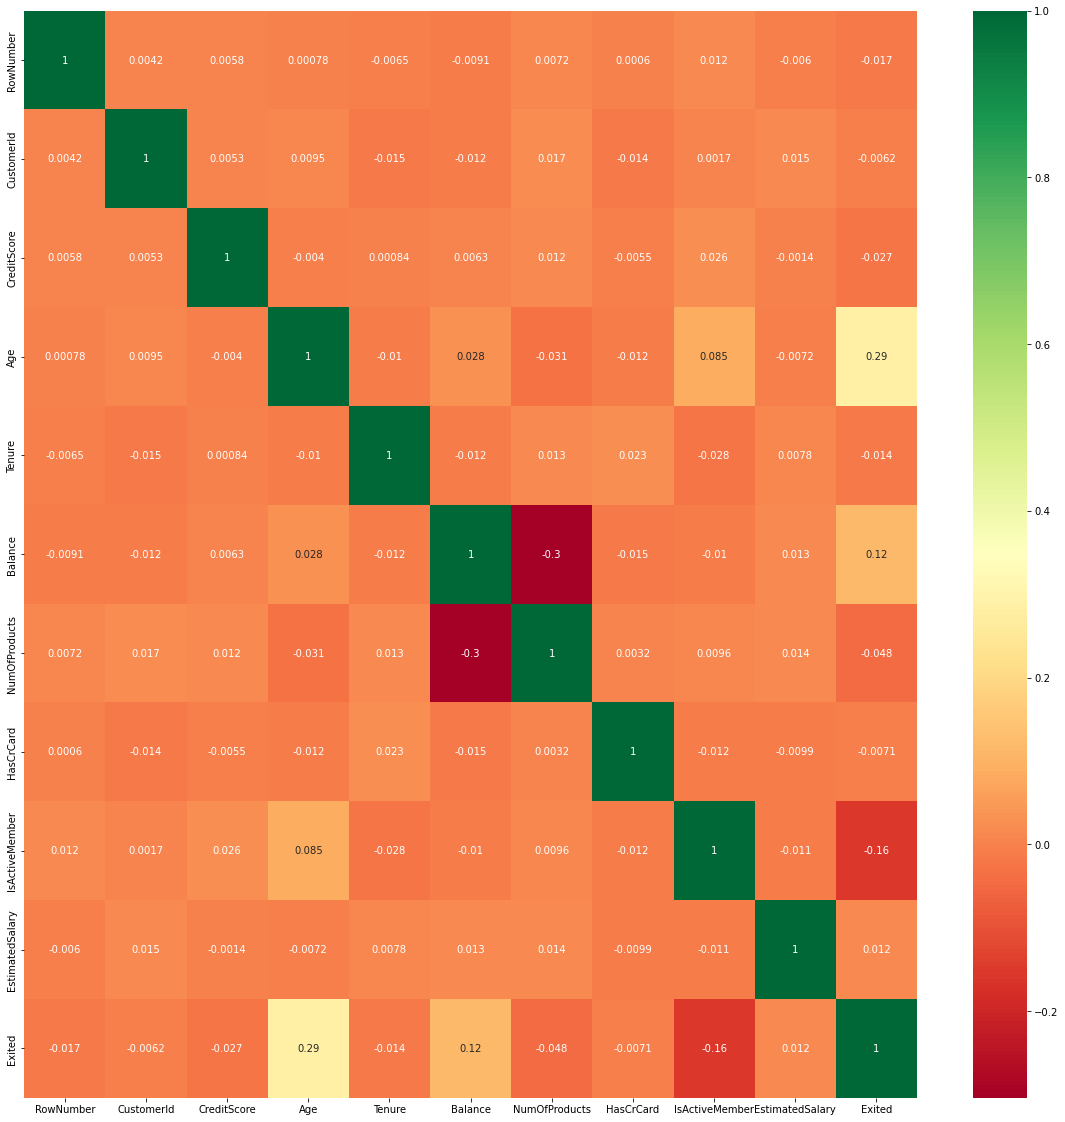

In [12]:
corrmat = df.corr()
top_corr_fature = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_fature].corr(),annot=True, cmap='RdYlGn')

In [13]:
x = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [14]:
geography = pd.get_dummies(x.Geography, drop_first=True)

In [15]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [16]:
gender = pd.get_dummies(x.Gender, drop_first=True)

In [17]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [18]:
x = x.drop(['Geography','Gender'],axis=1)

In [19]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [20]:
x = pd.concat([x,geography,gender],axis=1)

In [21]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [24]:
params = {
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth':[3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree':[0.3,0.4,0.5,0.7]
}

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
classifier = xgboost.XGBClassifier()

In [26]:
random_search=RandomizedSearchCV(
    estimator=classifier,param_distributions=params,
    n_iter=5, scoring='roc_auc',n_jobs=-1, cv=5, verbose=3)

In [27]:
random_search.fit(x,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [32]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [37]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.1,
 'colsample_bytree': 0.7}

In [38]:
classifier=xgboost.XGBClassifier(min_child_weight=1,max_depth=6,learning_rate=0.05,gamma=0.1,colsample_bytree=0.7)

In [39]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,x,y,cv=10)

In [40]:
score

array([0.869, 0.856, 0.873, 0.869, 0.862, 0.854, 0.862, 0.88 , 0.861,
       0.856])

In [44]:
print(score.max()*100)
print(score.min()*100)
print(score.mean()*100)

88.0
85.39999999999999
86.42
